Utilisation des arbres de Grenoble (déjà utilisé pour module sur pandas) pour introduction au machine learning ! But final : prédire l'année de plantation des abres.<br>
Dans ce premier notebook on importe les données, on les nettoie puis on els exporte dans un pickle afin de débuter les choses sérieuses !
lien data: http://data.metropolegrenoble.fr/ckan/dataset/les-arbres-de-grenoble

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd

# Importing df

In [2]:
df_trees=pd.read_csv('data/arbres.csv/ESP_PUBLIC.IDENTITE_ARBRE.csv')

## Quick glance 

In [3]:
#Quick glance
df_trees.head()

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,31906,ESP32632,ESP32632,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7407272631197..."
1,31905,ESP32631,ESP32631,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7407481744995..."
2,31904,ESP32630,ESP32630,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7406973948781..."
3,31903,ESP32629,ESP32629,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7406754967071..."
4,31902,ESP32628,ESP32628,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7407015656395..."


## Taking care of coordinates, popping the target, splitting

In [4]:
from sklearn.model_selection import train_test_split

def return_lon(row):
    lon=row['GeoJSON']
    lon=lon.split('[')[1]
    lon=lon.split(',')
    return float(lon[0])

def return_lat(row):
    lat=row['GeoJSON']
    lat=lat.split('[')[1]
    lat=lat.split(',')
    lat=lat[1][:-2]
    return float(lat)

df_trees.dropna(subset=['ANNEEDEPLANTATION'],inplace=True)
df_trees_Y=df_trees.pop('ANNEEDEPLANTATION')

df_trees['LON']=df_trees.apply(return_lon,axis=1)
df_trees['LAT']=df_trees.apply(return_lat,axis=1)
df_trees.drop(['GeoJSON'],axis=1,inplace=True)

df_trees_train, df_trees_test, df_trees_train_Y, df_trees_test_Y = train_test_split(df_trees, df_trees_Y, test_size=0.2, random_state=41)

# Selecting data

In [5]:
df_trees_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24337 entries, 30626 to 2271
Data columns (total 32 columns):
ELEM_POINT_ID            24337 non-null int64
CODE                     24337 non-null object
NOM                      24337 non-null object
GENRE                    24337 non-null object
GENRE_DESC               24337 non-null object
CATEGORIE                24337 non-null object
CATEGORIE_DESC           24337 non-null object
SOUS_CATEGORIE           24337 non-null object
SOUS_CATEGORIE_DESC      24337 non-null object
CODE_PARENT              24337 non-null object
CODE_PARENT_DESC         24337 non-null object
ADR_SECTEUR              24337 non-null int64
BIEN_REFERENCE           24337 non-null object
GENRE_BOTA               24298 non-null object
ESPECE                   22800 non-null object
VARIETE                  3364 non-null object
STADEDEDEVELOPPEMENT     23300 non-null object
EQUIPE                   0 non-null float64
REMARQUES                1141 non-null object
RA

## Removing NaNs columns

Doing it on the full dataframe, the one to be pickled.

In [6]:
df_trees.drop(['COURRIER','EQUIPE','ANNEEABATTAGE','ESSOUCHEMENT','DIAMETREARBRE','CAUSEABATTAGE'],axis=1,inplace=True)

In [7]:
# print(df_trees.GENRE.value_counts())
# print(df_trees.GENRE_DESC.value_counts())
# print(df_trees.CATEGORIE.value_counts())
# print(df_trees.CODE_PARENT.value_counts())
# print(df_trees.CODE_PARENT_DESC.value_counts())
# print(df_trees.ESPECE.value_counts())
print(df_trees_train.STADEDEDEVELOPPEMENT.value_counts())
print(df_trees_train.ADR_SECTEUR.value_counts())

Arbre adulte          18377
Arbre jeune            4530
Arbre vieillissant      393
Name: STADEDEDEVELOPPEMENT, dtype: int64
6    5626
5    5180
2    4643
3    3602
4    2967
1    2319
Name: ADR_SECTEUR, dtype: int64


## Removing columns filled with unique values and all distinct

In [8]:
df_trees_train.nunique()

ELEM_POINT_ID            24337
CODE                     24337
NOM                      24337
GENRE                        1
GENRE_DESC                   1
CATEGORIE                    1
CATEGORIE_DESC               1
SOUS_CATEGORIE               4
SOUS_CATEGORIE_DESC          4
CODE_PARENT               1431
CODE_PARENT_DESC          1431
ADR_SECTEUR                  6
BIEN_REFERENCE           24337
GENRE_BOTA                 111
ESPECE                     251
VARIETE                    172
STADEDEDEVELOPPEMENT         3
EQUIPE                       0
REMARQUES                    9
RAISONDEPLANTATION           2
TRAITEMENTCHENILLES          3
COURRIER                     0
IDENTIFIANTPLU              42
TYPEIMPLANTATIONPLU          4
INTITULEPROTECTIONPLU        3
ANNEEABATTAGE                0
ESSOUCHEMENT                 0
DIAMETREARBRE                0
CAUSEABATTAGE                0
COLLECTIVITE                 2
LON                      24336
LAT                      24336
dtype: i

In [9]:
df_trees.drop(['NOM','ELEM_POINT_ID','BIEN_REFERENCE','GENRE','GENRE_DESC'],axis=1,inplace=True)

## Removing parse values

In [10]:
df_trees.drop(['RAISONDEPLANTATION','IDENTIFIANTPLU','TRAITEMENTCHENILLES','TYPEIMPLANTATIONPLU','INTITULEPROTECTIONPLU'],axis=1,inplace=True)

## Looking more closely

In [20]:
print(df_trees_train.SOUS_CATEGORIE.value_counts())
print(df_trees_train.SOUS_CATEGORIE_DESC.value_counts())
print(df_trees_train.VARIETE.value_counts())

ESP174    12487
ESP151     9295
ESP065     1685
ESP187      870
Name: SOUS_CATEGORIE, dtype: int64
Arbre d'espaces ouverts      12487
Arbre de voirie               9295
Arbre d'enceintes fermées     1685
Bois semi naturel              870
Name: SOUS_CATEGORIE_DESC, dtype: int64
Austriaca       966
Wierii          282
Chanticleer     266
Italica         225
Pyramidalis     148
               ... 
Winter Gold       1
Chrysocoma        1
Fuyu              1
Beurre Hardy      1
Quetsche          1
Name: VARIETE, Length: 172, dtype: int64


CODE_PARENT and CODE_PARENT_DESC are the same things. Useful? Similar to localisation.<br>
Same for CATEGORIE and CATEGORIE_DESC<br>
Let's keep the texts one, we ca always encode them later.<br>
ADR-SECTEUR is a cluster of localisations. Since we have localisations we can drop it later and do clustering ourselfs.

In [12]:
df_trees.drop(['CODE_PARENT','CATEGORIE'],axis=1,inplace=True)

In [13]:
df_trees_train.isnull().sum()

ELEM_POINT_ID                0
CODE                         0
NOM                          0
GENRE                        0
GENRE_DESC                   0
CATEGORIE                    0
CATEGORIE_DESC               0
SOUS_CATEGORIE               0
SOUS_CATEGORIE_DESC          0
CODE_PARENT                  0
CODE_PARENT_DESC             0
ADR_SECTEUR                  0
BIEN_REFERENCE               0
GENRE_BOTA                  39
ESPECE                    1537
VARIETE                  20973
STADEDEDEVELOPPEMENT      1037
EQUIPE                   24337
REMARQUES                23196
RAISONDEPLANTATION       22925
TRAITEMENTCHENILLES      22517
COURRIER                 24337
IDENTIFIANTPLU           23840
TYPEIMPLANTATIONPLU      23840
INTITULEPROTECTIONPLU    23840
ANNEEABATTAGE            24337
ESSOUCHEMENT             24337
DIAMETREARBRE            24337
CAUSEABATTAGE            24337
COLLECTIVITE                 0
LON                          0
LAT                          0
dtype: i

Remarques is too parse, not relevant to our problem.

In [14]:
df_trees.drop(['REMARQUES'],axis=1,inplace=True)

We have redundant columns, we may keep only one of them.

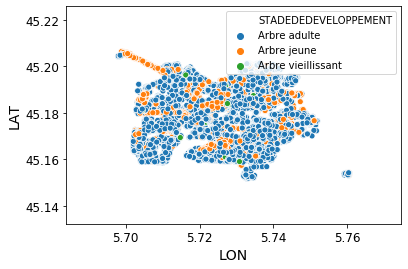

In [15]:
import seaborn as sns
sns.scatterplot(x="LON", y="LAT", hue ="STADEDEDEVELOPPEMENT", data = df_trees_train)
plt.legend()

Stade de développement seems to have some sense in it

In [16]:
df_trees.head()

,CODE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT_DESC,ADR_SECTEUR,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,COLLECTIVITE,LON,LAT
0,ESP32632,Arbre,ESP174,Arbre d'espaces ouverts,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,Ville de Grenoble,5.740727,45.190539
1,ESP32631,Arbre,ESP174,Arbre d'espaces ouverts,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,Ville de Grenoble,5.740748,45.190525
2,ESP32630,Arbre,ESP174,Arbre d'espaces ouverts,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,Ville de Grenoble,5.740697,45.190498
3,ESP32629,Arbre,ESP174,Arbre d'espaces ouverts,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,Ville de Grenoble,5.740675,45.190491
4,ESP32628,Arbre,ESP174,Arbre d'espaces ouverts,Prc Echangeurs Bastion St Roch,5,Acer,pseudoplatanus,NaN,Arbre adulte,Ville de Grenoble,5.740702,45.190479


# Others tools

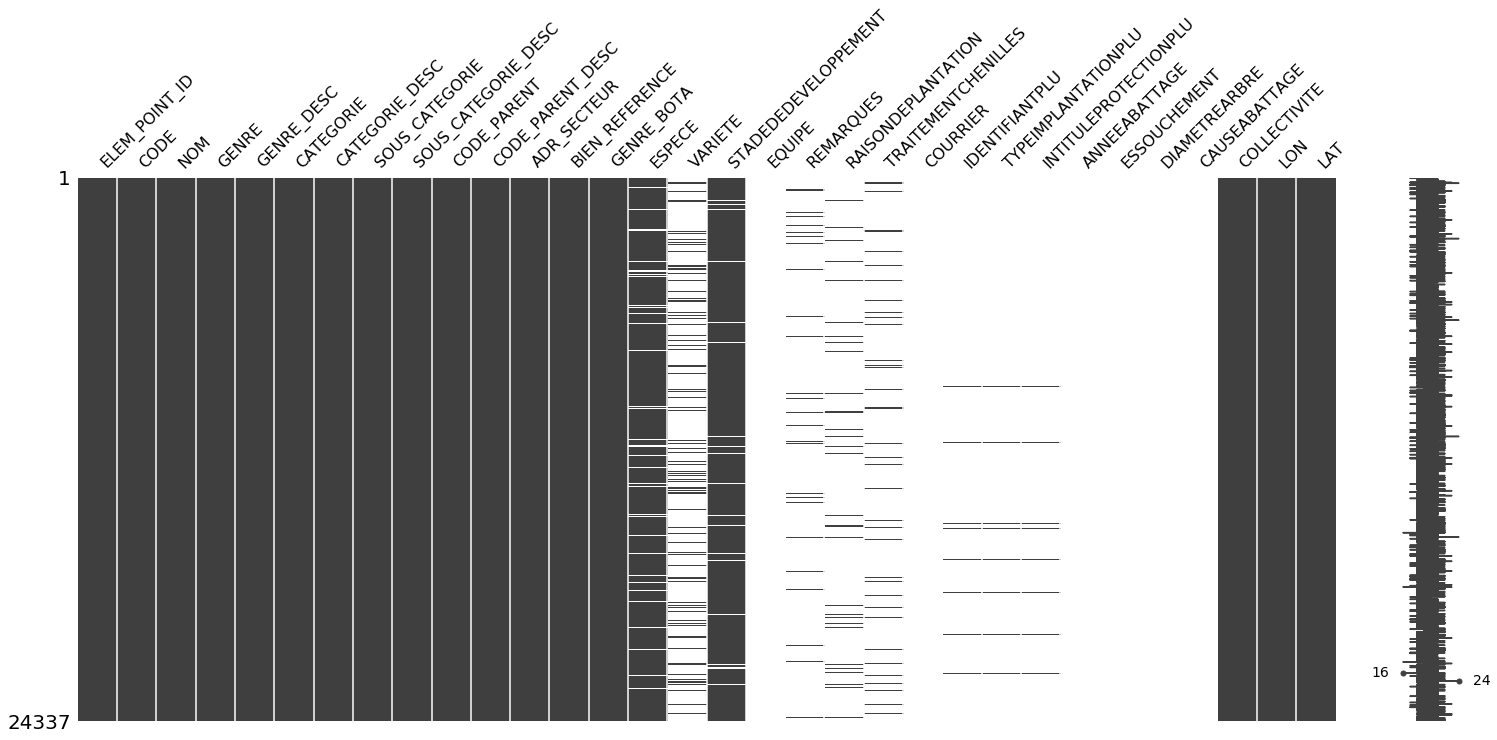

In [17]:
import missingno as msno
msno.matrix(df_trees_train)

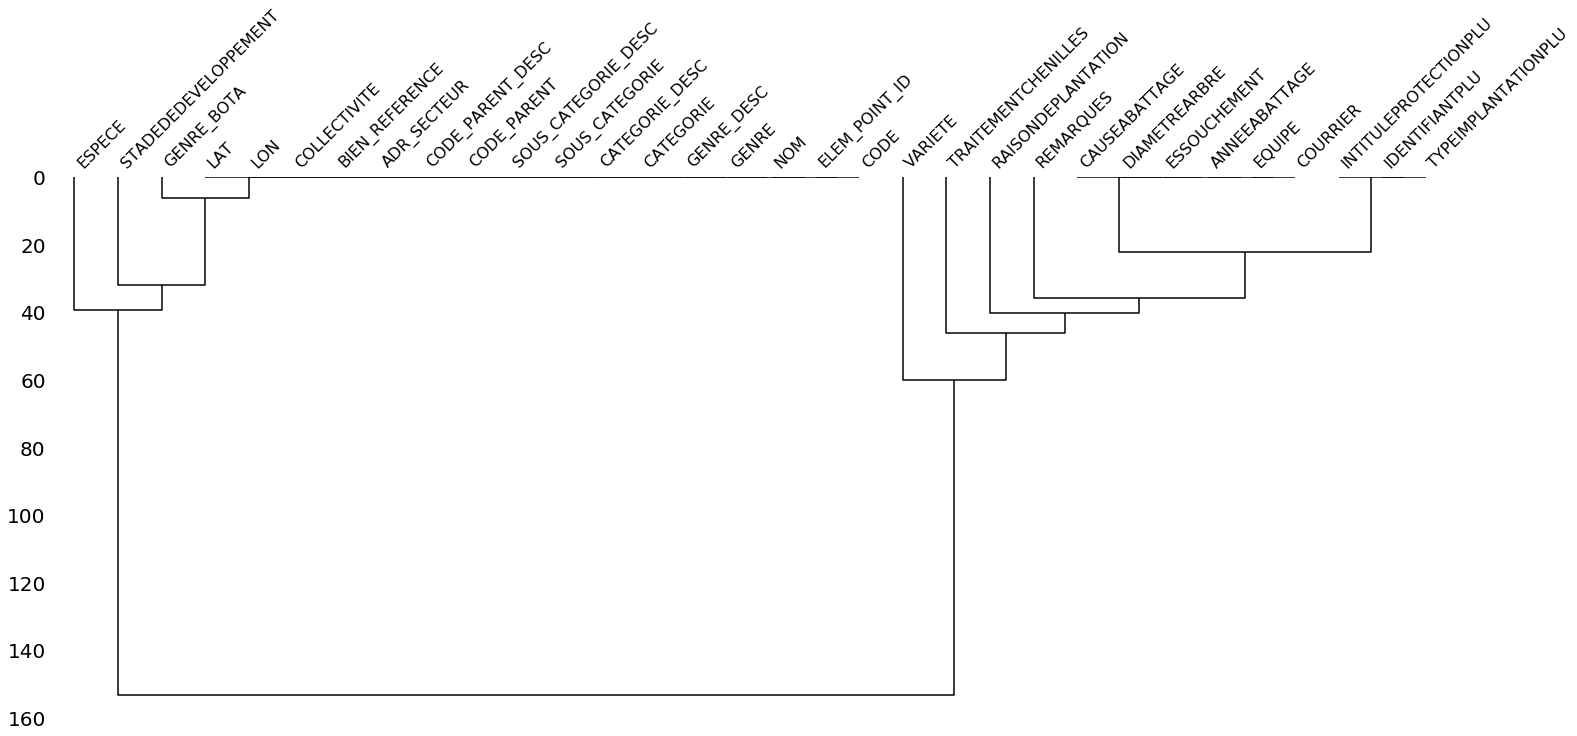

In [18]:
msno.dendrogram(df_trees_train)

# Pickling

In [21]:
#Adding the target:
df_trees['ANNEEDEPLANTATION']=df_trees_Y
df_trees.to_pickle('trees_first_clean.pkl')